dataframe info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non

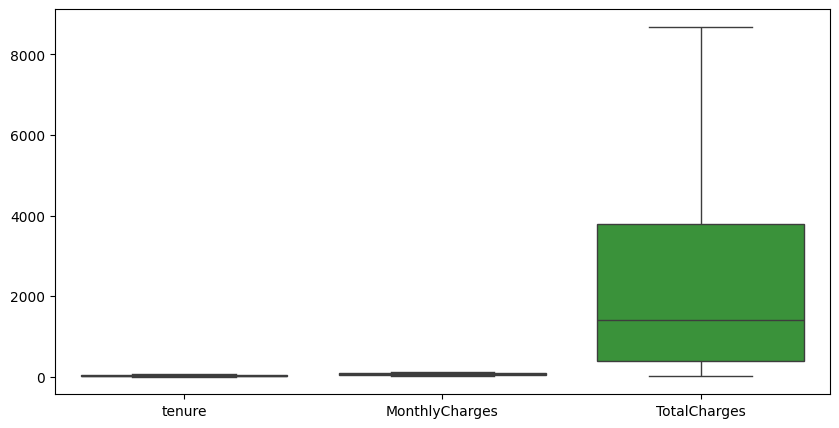


cleaned data is saved as 'telco_cleaned.csv'


In [4]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# 1. data load
df = pd.read_csv('telco_customer_churn.csv')

# 2. check dataframe structure
print("dataframe info:")
print(df.info())
print("\nfirst 5 lines:")
print(df.head())
print("\nChurn distribution:")
print(df['Churn'].value_counts())

# 3. change nulls
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')
print("\nTotalCharges null counts:", df['TotalCharges'].isnull().sum())
df['TotalCharges'] = df['TotalCharges'].fillna(df['TotalCharges'].mean())
print("TotalCharges after null transformed:", df['TotalCharges'].isnull().sum())

# 4. binary incoding
binary_columns = ['Partner', 'Dependents', 'PhoneService', 'PaperlessBilling', 'Churn']
for col in binary_columns:
    print(f"{col} original values (before transformation):", df[col].unique())
    df[col] = df[col].str.strip().str.capitalize()
    df[col] = df[col].map({'Yes': 1, 'No': 0})
    print(f"{col} original value (after transformation):", df[col].unique())

# 5. data type transformation
df['SeniorCitizen'] = df['SeniorCitizen'].map({0: 'No', 1: 'Yes'})


categorical_columns = ['gender', 'MultipleLines', 'InternetService', 'OnlineSecurity', 
                      'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 
                      'StreamingMovies', 'Contract', 'PaymentMethod']
df = pd.get_dummies(df, columns=categorical_columns, drop_first=True)


plt.figure(figsize=(10, 5))
sns.boxplot(data=df[['tenure', 'MonthlyCharges', 'TotalCharges']])
plt.show()

# 6. remove not needed columns
df.drop('customerID', axis=1, inplace=True)

# 9. save cleaned data
df.to_csv('telco_cleaned.csv', index=False)
print("\ncleaned data is saved as 'telco_cleaned.csv'")

In [31]:
import pandas as pd

# 정제된 데이터 로드
df = pd.read_csv('telco_cleaned.csv')

# 데이터프레임 정보 확인
print("데이터프레임 정보:")
print(df.info())
print("\n처음 5행:")
print(df.head())
print("\nChurn 분포:")
print(df['Churn'].value_counts())

데이터프레임 정보:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 31 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   SeniorCitizen                          7043 non-null   object 
 1   Partner                                7043 non-null   int64  
 2   Dependents                             7043 non-null   int64  
 3   tenure                                 7043 non-null   int64  
 4   PhoneService                           7043 non-null   int64  
 5   PaperlessBilling                       7043 non-null   int64  
 6   MonthlyCharges                         7043 non-null   float64
 7   TotalCharges                           7043 non-null   float64
 8   Churn                                  7043 non-null   int64  
 9   gender_Male                            7043 non-null   bool   
 10  MultipleLines_No phone service         7043 non-null   bool  

In [34]:
churn_rate = df['Churn'].mean()
print(f"Total Churn Rate: {churn_rate:.2%}")

Total Churn Rate: 26.54%


In [12]:
#calculate average by churn
print("Continuos variable by churn status:")
print(df.groupby('Churn')[['tenure', 'MonthlyCharges', 'TotalCharges']].mean())

Continuos variable by churn status:
          tenure  MonthlyCharges  TotalCharges
Churn                                         
0      37.569965       61.265124   2554.765772
1      17.979133       74.441332   1531.796094


In [13]:
#average by churn
#Continuos variable by churn status:
          #tenure  MonthlyCharges  TotalCharges
#Churn                                         
#0      37.569965       61.265124   2554.765772
#1      17.979133       74.441332   1531.796094

In [ ]:
#'Contract_One year', 'Contract_Two year'

In [17]:
print("churn rate by contract types:")
contract_cols = ['Contract_One year', 'Contract_Two year']
for col in contract_cols:
    churn_rate = df.groupby(col)['Churn'].mean()
    print(f"{col}:\n{churn_rate}\n")

churn rate by contract types:
Contract_One year:
Contract_One year
False    0.305745
True     0.112695
Name: Churn, dtype: float64

Contract_Two year:
Contract_Two year
False    0.340501
True     0.028319
Name: Churn, dtype: float64



In [20]:
print("Churn rate by payment method:")
payment_cols = ['PaymentMethod_Electronic check', 'PaymentMethod_Mailed check', 'PaymentMethod_Credit card (automatic)']
for col in payment_cols:
    churn_rate = df.groupby(col)['Churn'].mean()
    print(f"{col}:\n{churn_rate}\n")

Churn rate by payment method:
PaymentMethod_Electronic check:
PaymentMethod_Electronic check
False    0.170586
True     0.452854
Name: Churn, dtype: float64

PaymentMethod_Mailed check:
PaymentMethod_Mailed check
False    0.287424
True     0.191067
Name: Churn, dtype: float64

PaymentMethod_Credit card (automatic):
PaymentMethod_Credit card (automatic)
False    0.296504
True     0.152431
Name: Churn, dtype: float64



In [21]:
print("Churn rate by internet service type:")
internet_cols = ['InternetService_Fiber optic', 'InternetService_No']
for col in internet_cols:
    churn_rate = df.groupby(col)['Churn'].mean()
    print(f"{col}:\n{churn_rate}\n")

Churn rate by internet service type:
InternetService_Fiber optic:
InternetService_Fiber optic
False    0.144920
True     0.418928
Name: Churn, dtype: float64

InternetService_No:
InternetService_No
False    0.318289
True     0.074050
Name: Churn, dtype: float64



In [34]:
# Change Yes/No to 1/0 on SeniorCitizen Column
df['seniorcitizen'] = df['seniorcitizen'].map({'Yes': 1, 'No': 0})

# check
print("seniorcitizen value after change:", df['seniorcitizen'].unique())

seniorcitizen value after change: [nan]


In [30]:
# change all column names into lower case
df.columns = df.columns.str.lower()

# check
print("names transformed into lower case:", df.columns)

names transformed into lower case: Index(['seniorcitizen', 'partner', 'dependents', 'tenure', 'phoneservice',
       'paperlessbilling', 'monthlycharges', 'totalcharges', 'churn',
       'gender_male', 'multiplelines_no phone service', 'multiplelines_yes',
       'internetservice_fiber optic', 'internetservice_no',
       'onlinesecurity_no internet service', 'onlinesecurity_yes',
       'onlinebackup_no internet service', 'onlinebackup_yes',
       'deviceprotection_no internet service', 'deviceprotection_yes',
       'techsupport_no internet service', 'techsupport_yes',
       'streamingtv_no internet service', 'streamingtv_yes',
       'streamingmovies_no internet service', 'streamingmovies_yes',
       'contract_one year', 'contract_two year',
       'paymentmethod_credit card (automatic)',
       'paymentmethod_electronic check', 'paymentmethod_mailed check'],
      dtype='object')


In [35]:
# change bool type rows to int64
bool_columns = df.select_dtypes(include=['bool']).columns
df[bool_columns] = df[bool_columns].astype('int64')

# check dataframe info after change
print("dataframe info after change:")
print(df.info())

dataframe info after change:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 31 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   seniorcitizen                          0 non-null      float64
 1   partner                                7043 non-null   int64  
 2   dependents                             7043 non-null   int64  
 3   tenure                                 7043 non-null   int64  
 4   phoneservice                           7043 non-null   int64  
 5   paperlessbilling                       7043 non-null   int64  
 6   monthlycharges                         7043 non-null   float64
 7   totalcharges                           7043 non-null   float64
 8   churn                                  7043 non-null   int64  
 9   gender_male                            7043 non-null   int64  
 10  multiplelines_no phone service         7043

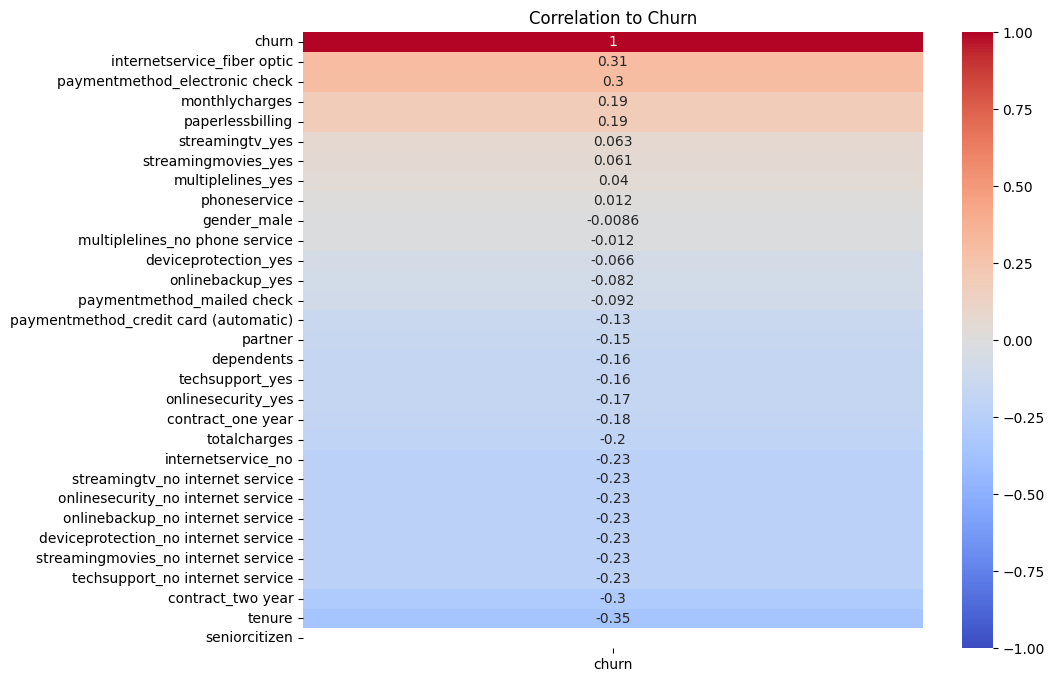

In [36]:
import seaborn as sns
import matplotlib.pyplot as plt

# calculate correlation matrix
correlation_matrix = df.corr()

# Visualise the hitmap (filter to see correlation to churn)
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix[['churn']].sort_values(by='churn', ascending=False), 
            annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title("Correlation to Churn")
plt.show()

In [39]:
# contract type column add
df['contract_type'] = 'Month-to-month'
df.loc[df['contract_one year'] == 1, 'contract_type'] = 'One year'
df.loc[df['contract_two year'] == 1, 'contract_type'] = 'Two year'

# save data
df.to_csv('telco_cleaned_for_viz.csv', index=False)
print("'telco_cleaned_for_viz.csv' is saved")

'telco_cleaned_for_viz.csv' is saved
